In [1]:

#import libiraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import pyplot as pl
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten ,GaussianNoise
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
#next commints should run at least 1 time
dir  ="J:\Term 5\Selected\ML project\Data\Train_Data"

categories = ['Fire', 'Non_Fire']

data= []

for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        pet_img = cv2.imread(img_path,0)
        try:
            forest_img = cv2.resize(pet_img,(50,50))
            image = np.array(forest_img).flatten()
            
            data.append([image,label])
        except Exception as e:
            pass
    

In [3]:
random.shuffle(data)
features = []
labels = []

In [4]:

for feature ,label in data:
    features.append(feature)
    labels.append(label)

In [5]:
x_train ,x_test , y_train, y_test = train_test_split(features, labels, test_size= 0.01)


model = SVC(C=1,kernel='rbf',gamma='auto')
model.fit(x_train,y_train)

SVC(C=1, gamma='auto')

Predection is :  Fire


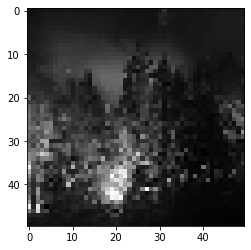

In [6]:
prediction = model.predict(x_test)

accuracy = model.score(x_test,y_test)

categories = ['Fire', 'Non_Fire']

print("Predection is : " ,categories[prediction[0]] )

mypet=x_test[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()

tf.Tensor(
[[20  0]
 [16 11]], shape=(2, 2), dtype=int32)


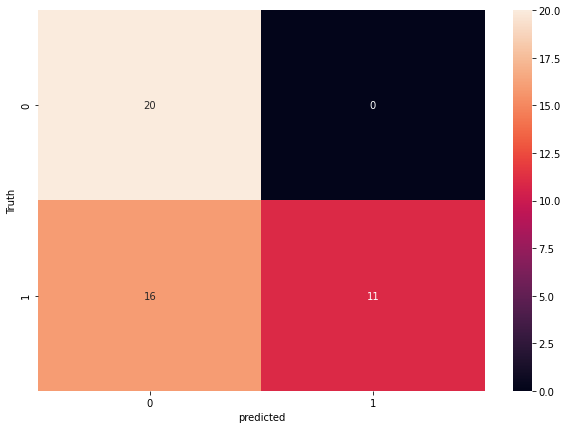

In [7]:
# Making the Confusion Matrix
cm = tf.math.confusion_matrix(y_test, prediction)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
print(cm)

Roc AUC: 0.70


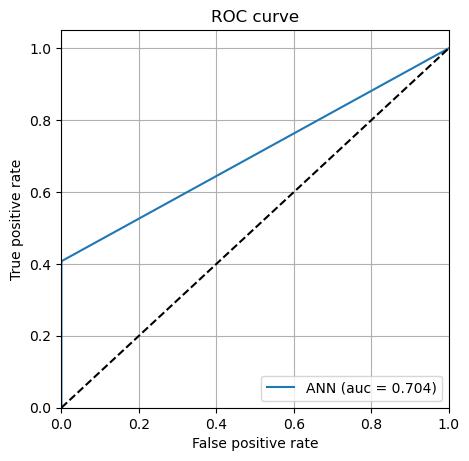

0.6595744680851063

In [8]:
# ROC curve

fpr, tpr,_ = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)

# calcualte AUC
print('Roc AUC: %0.2f' % roc_auc)
# plot of ROC curve for a specified class
plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='ANN (auc = %0.3f)' %roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

accuracy_score(y_test, prediction)

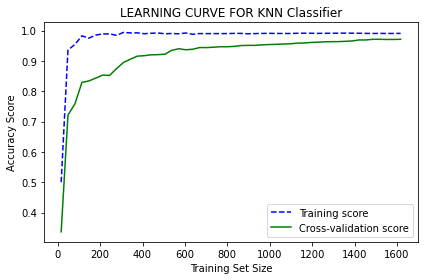

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
  
# Load data set
dataset = load_digits()
  
# X contains data and y contains labels
X, y = dataset.data, dataset.target
  
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()